In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("visits_2022-02-01_2022-05-02_shopify.csv")

In [4]:
df

,day,ua_form_factor,ua_os_version,location_city,location_region,referrer_host,referrer_url,total_visitors,total_sessions,avg_duration,total_bounce_rate,total_carts,total_checkouts
0,2022-04-20,Desktop,11.0,Council Bluffs,Iowa,NaN,NaN,1,1,0s,1.0,0,0
1,2022-04-22,Mobile,15.0,Monterrey,Nuevo León,NaN,NaN,1,1,0s,1.0,0,0
2,2022-02-28,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0s,0.0,0,0
3,2022-04-20,Mobile,15.0,NaN,NaN,m.facebook.com,m.facebook.com,1,1,0s,1.0,0,0
4,2022-03-07,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0s,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2022-05-02,Desktop,NaN,San Pedro Garza Garcia,Nuevo Leon,albanamx.myshopify.com,albanamx.myshopify.com/products/julie-color-cafe,1,1,1m7s,0.0,1,1
205,2022-05-02,Mobile,15.4,Leon,Guanajuato,NaN,NaN,1,1,36m8s,0.0,0,1
206,2022-04-21,Mobile,15.0,León,Guanajuato,NaN,NaN,1,2,3m9s,0.0,0,1
207,2022-04-20,Mobile,15.0,Tijuana,Baja California,NaN,NaN,1,1,5m10s,0.0,1,1


In [5]:
# Cambiar valores de avg_duration 
# Convertir avg_duration a minutos 
def avg_duration_convertion(x):
    number = 0

    value = x
    value = value.split("s")
    value = value[0]
    
    if "m" not in value and "h" not in value:
        number += float(value)

    if "m" in value:
        value = value.split("m")
        second = value[1]
        second = float(second)
        
        number += second 

        if "h" in value[0]:
            hour_min = value[0].split("h")
            minute = hour_min[1]
            hour = hour_min[0]
            
            minute = float(minute) * 60
            hour = float(hour) * 3600

            number += minute
            number += hour

        else:
            minute = value[0]
            minute = float(minute) * 60
            number += minute

    return number / 60

df.avg_duration = df.avg_duration.apply(avg_duration_convertion)

C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_15688/203640772.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels = df_day_visitors.day, rotation = 60, fontsize = 8.3)
C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_15688/203640772.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels = df_day_duration.day, rotation = 60, fontsize = 8.3)
No handles with labels found to put in legend.


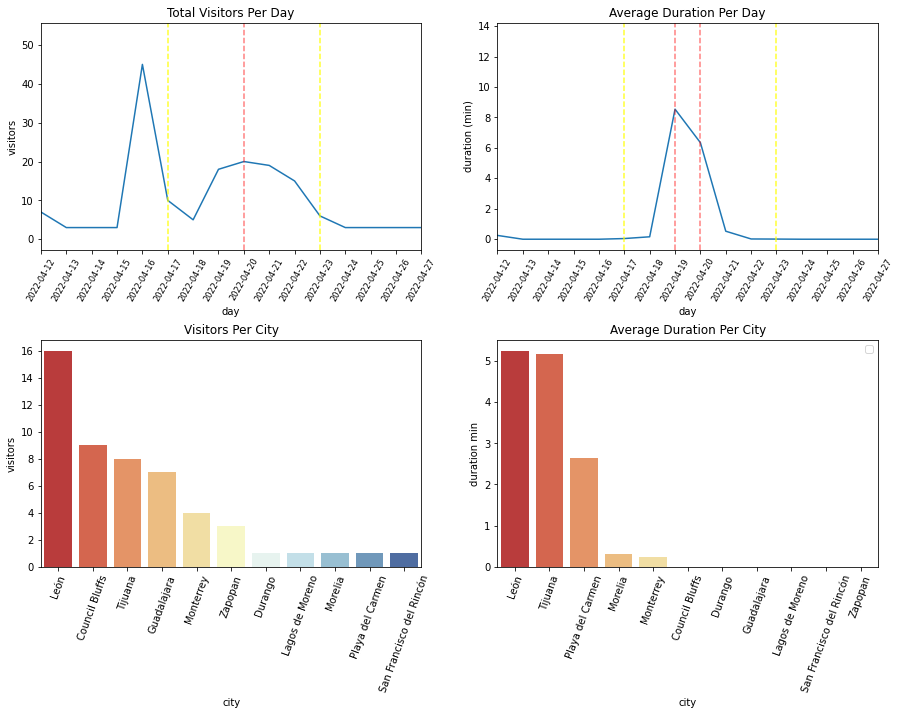

In [6]:
# Quiero saber como se concentraron los dias y las visitas
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

# DataFrame temporal para crear valores visitas por fecha
df_day_visitors = df.groupby("day")["total_visitors"].sum().reset_index()

# DataFrame temporal para crear valores duracion por fecha
df_day_duration = df.groupby("day")["avg_duration"].mean().reset_index()

# DataFrame para obtener ciudades mas frecuentadas
df_city_count = pd.DataFrame(df.value_counts("location_city").reset_index())
df_city_count.columns = ["location_city", "count"]

# Cambiar nombre de Dolores Hidalgo
df_city_count.location_city = df_city_count.location_city.apply(lambda x : "Dolores Hidalgo" if x == "Dolores Hidalgo Cuna de la Independencia Nacional" else x)

# Obtener DataFrame (2022-04-17 - 2022-04-25)
official_day = []
month = []
year = []

def new_columns(x):
    values = x.day.split("-")
    year.append(int(values[0]))
    month.append(int(values[1]))
    official_day.append(int(values[2]))

df.apply(new_columns, axis = 1)

df["year"] = year
df["month"] = month
df["official_day"] = official_day

df_campaign_date = df[(df.month == 4) & (df.official_day > 17) & (df.official_day < 25)]

# Data Frame para obtener ciudades mas frecuentadas en campana 
df_campaign_city_count = df_campaign_date.value_counts("location_city").reset_index()
df_campaign_city_count.columns = ["location_city", "count"]

# DataFrame para obtener ciudades con mas timepo en web
df_avg_duration = df_campaign_date[["location_city", "avg_duration"]]

df_avg_duration = df_avg_duration[df_avg_duration.avg_duration < 10]
df_avg_duration = df_avg_duration.groupby("location_city")["avg_duration"].sum().reset_index()
df_avg_duration = df_avg_duration.sort_values(by = "avg_duration", ascending = False)


ax1 = sns.lineplot(data = df_day_visitors, x = "day", y = "total_visitors", ax = axes[0][0], palette = "magma")
ax1.set_xlim(70, 85)
ax1.set_xticklabels(labels = df_day_visitors.day, rotation = 60, fontsize = 8.3)
ax1.axvline(x = "2022-04-20", color = "red", linestyle = "--", alpha = 0.5)
ax1.axvline(x = "2022-04-17", color = "yellow", linestyle = "--", alpha = 0.8, label = "Facebook Campaign Starts")
ax1.axvline(x = "2022-04-23", color = "yellow", linestyle = "--", alpha = 0.8, label = "Facebook Campaign Ends")
ax1.set_title("Total Visitors Per Day")
ax1.set_ylabel("visitors")


ax2 = sns.lineplot(data = df_day_duration, x = "day", y = "avg_duration", ax = axes[0][1], palette = "magma")
ax2.set_xlim(70, 85)
ax2.set_xticklabels(labels = df_day_duration.day, rotation = 60, fontsize = 8.3)
ax2.axvline(x = "2022-04-19", color = "red", alpha = 0.5, linestyle = "--")
ax2.axvline(x = "2022-04-20", color = "red", alpha = 0.5, linestyle = "--")
ax2.axvline(x = "2022-04-17", color = "yellow", linestyle = "--", alpha = 0.8, label = "Facebook Campaign Starts")
ax2.axvline(x = "2022-04-23", color = "yellow", linestyle = "--", alpha = 0.8, label = "Facebook Campaign Ends")
ax2.set_ylabel("duration (min)")
ax2.set_title("Average Duration Per Day")


ax3 = sns.barplot(data = df_campaign_city_count, x = "location_city", y = "count", ax = axes[1][0], palette = "RdYlBu")
ax3.set_xticklabels(labels = df_campaign_city_count.location_city, rotation = 70)
ax3.set_title("Visitors Per City")
ax3.set_ylabel("visitors")
ax3.set_xlabel("city")

ax4 = sns.barplot(data = df_avg_duration, x = "location_city", y = "avg_duration", ax = axes[1][1], palette = "RdYlBu")
ax4.set_xticklabels(labels = df_avg_duration.location_city, rotation = 70)
ax4.set_title("Average Duration Per City")
ax4.set_xlabel("city")
ax4.set_ylabel("duration min")


plt.subplots_adjust(hspace=0.4)
plt.legend()
plt.show()

In [7]:
df_visitors = pd.read_csv("visits_2022-04-14_2022-05-20.csv")

In [8]:
df_visitors.head()

,day,location_region,location_city,total_visitors,total_sessions
0,2022-04-14,Iowa,Council Bluffs,1,1
1,2022-04-14,NaN,NaN,2,2
2,2022-04-15,NaN,NaN,1,1
3,2022-04-15,Iowa,Council Bluffs,2,2
4,2022-04-16,Iowa,Council Bluffs,2,2


<Figure size 432x288 with 0 Axes>

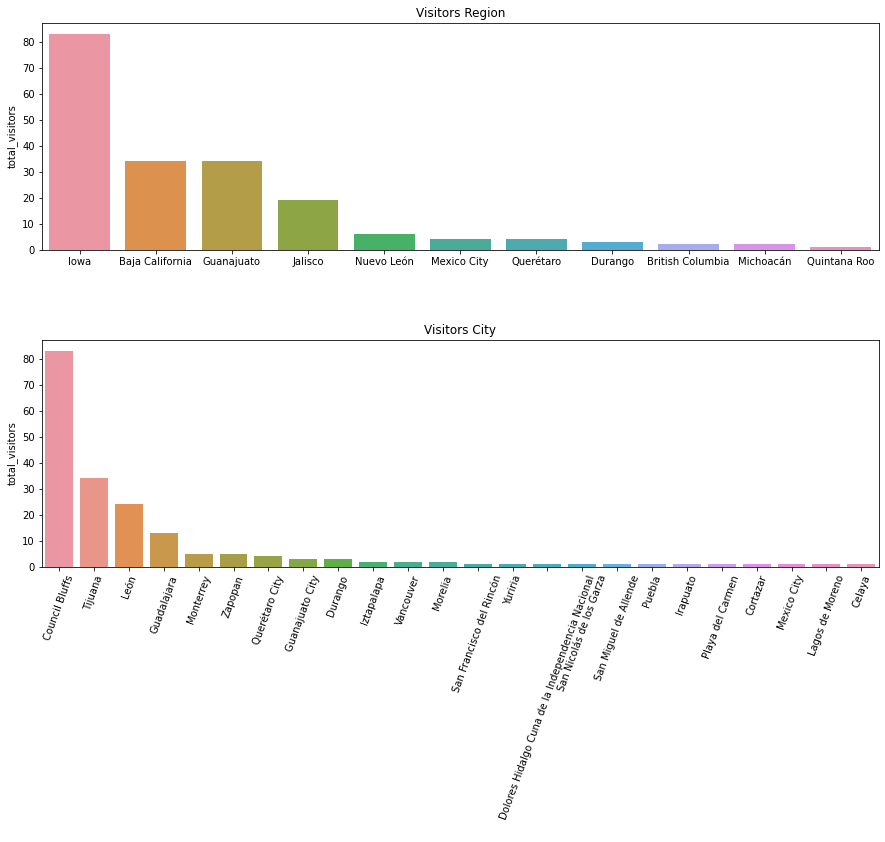

In [58]:
df_visitors_region =  df_visitors.groupby("location_region").total_visitors.sum().reset_index()
df_visitors_region = df_visitors_region.sort_values(by = "total_visitors", ascending = False)

df_visitors_city = df_visitors.groupby("location_city").total_visitors.sum().reset_index()
df_visitors_city = df_visitors_city.sort_values(by = "total_visitors", ascending = False)

plt.clf()

fig, ax = plt.subplots(2, 1, figsize = (15, 10))

ax1 = sns.barplot(data = df_visitors_region, x = "location_region", y = "total_visitors", ax = ax[0])
ax1.set_title("Visitors Region")
ax1.set_xlabel("")

ax2 = sns.barplot(data = df_visitors_city, x = "location_city", y = "total_visitors", estimator = sum, ax = ax[1])
ax2.set_xticklabels(labels = df_visitors_city.location_city, rotation = 70)
ax2.set_title("Visitors City")
ax2.set_xlabel(" ")

plt.subplots_adjust(hspace = 0.4)
plt.show()